## MINI PROJECT 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Regression_Insurance_Data.csv')
df

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


#### DATA PREPROCESSING

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.shape

(1338, 8)

In [7]:
df.size

10704

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [9]:
df.value_counts()

age   sex     bmi     classif  children  smoker  region     charges    
 19   male    30.590  OB1      0         no      northwest  1639.56310     2
-58   male    49.060  OB3      0         no      southeast  11381.32540    1
 47   male    29.800  PREO     3         yes     southwest  25309.48900    1
 48   female  22.800  N        0         no      southwest  8269.04400     1
 47   male    47.520  OB3      1         no      southeast  8083.91980     1
                                                                          ..
 31   female  21.755  N        0         no      northwest  4134.08245     1
 30   male    44.220  OB3      2         no      southeast  4266.16580     1
              38.830  OB2      1         no      southeast  18963.17192    1
              37.800  OB2      2         yes     southwest  39241.44200    1
 190  female  30.495  OB1      0         no      northwest  2128.43105     1
Length: 1329, dtype: int64

In [10]:
df['age'].unique()

array([ 19,  18,  28,   0,  32,  31,  46,  37,  60,  25,  62,  23,  56,
        27,  52,  30,  34,  59,  63,  55,  22,  26,  35,  24,  41,  38,
        36,  21,  48,  40,  58,  53,  43,  64,  20,  61,  44,  57,  29,
        45,  54, -58,  49,  47,  51,  42,  50,  39,  33, 190,  -1],
      dtype=int64)

In [11]:
df['age']=df['age'].replace((-1,-58,190),np.nan)

In [12]:
df['age'].median()

39.0

In [13]:
df['age']=df['age'].fillna(39.0)
df['age'].unique()

array([19., 18., 28.,  0., 32., 31., 46., 37., 60., 25., 62., 23., 56.,
       27., 52., 30., 34., 59., 63., 55., 22., 26., 35., 24., 41., 38.,
       36., 21., 48., 40., 58., 53., 43., 64., 20., 61., 44., 57., 29.,
       45., 54., 39., 49., 47., 51., 42., 50., 33.])

## ====== VISUALIZATION =======

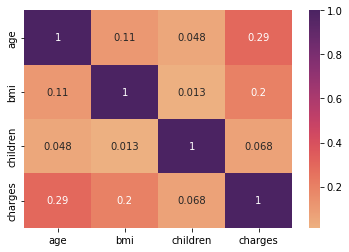

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='flare');

#### INTERPRETATION: SMOKING ,AGE & BMI RESPECTIVELY ARE THE HIGHLY CORRELATED WITH CHARGES,WHICH MEANS THESE FACTORS ARE MORE AFFECTING.

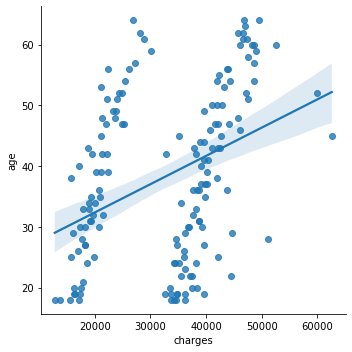

In [15]:
df3=df[(df['sex']=='male') & (df['smoker']=='yes')]
sns.lmplot('charges','age',data=df3);

#### INTERPRETATION: FOR MALE WITH SMOKING ,CHARGES AND AGE HAS LINEAR RELATIONSHIP BETWEEN THEM WITH  MOST DISTRIBUTION OF CHARGES IS BETWEEN 20000-40000 .

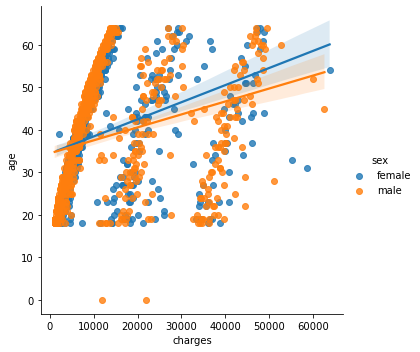

In [16]:
sns.lmplot('charges','age',data=df,hue='sex');

#### INTERPRETATION:MOST OF THE DISTRIBUTION IS FOR AGE 20-60 WITH CHARGES SPREADABILITY IS BETWEEN 0-10000 FOR MOST OF THE  MALE AND FEMALES.

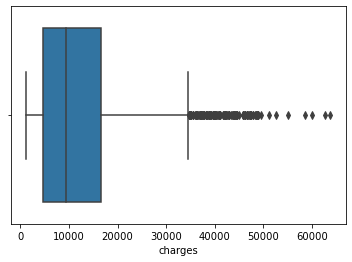

In [17]:
sns.boxplot(df['charges']);

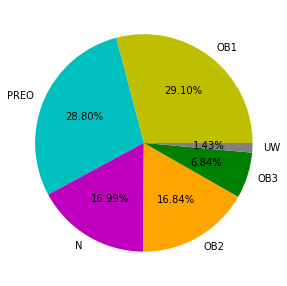

In [18]:
fig=plt.figure(figsize=(8,5))
plt.pie(df['classif'].value_counts(),labels=df['classif'].value_counts().keys(),colors=('y','c','m','orange','g','grey'),autopct='%0.2f%%');

#### INTERPRETATION: OB1 HAS THE HIGHEST PROPORTION FOR CLASSIFICATION.

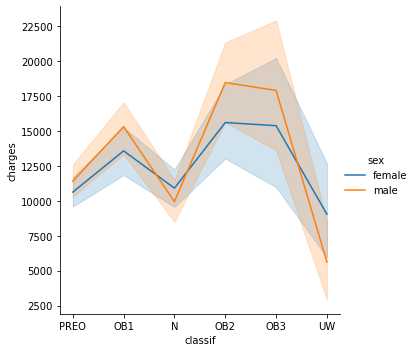

In [19]:
sns.relplot(data=df, kind="line", x="classif", y="charges", hue="sex");

#### INTERPRETATION: FOR OB2 MALES AND FEMALES HAS THE HIGHEST DISTRIBUTION & FOR UW IT IS LOWEST.

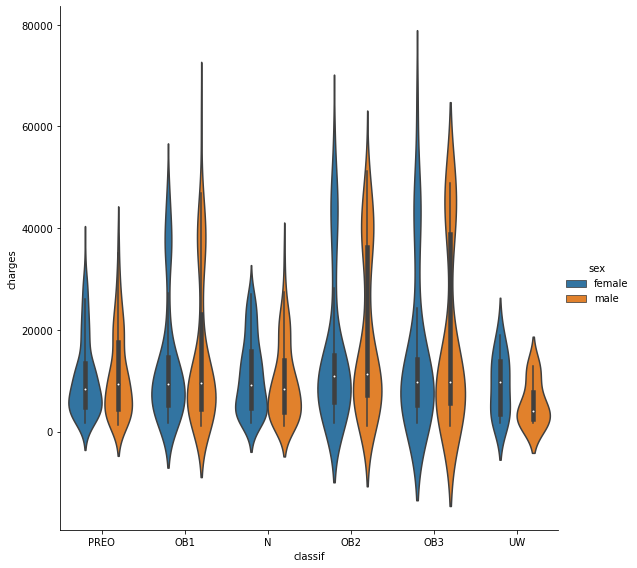

In [20]:
sns.catplot(data=df, kind="violin", x="classif", y="charges", hue="sex",height=8);

#### INTERPRETATION: OB2 CLASSIFICATION IS SHOWING THE HIGHEST DISTRIBUTION OF CHARGES FOR MALES AND FEMALES & UW HAS THE LEAST DISTRIBUTION.

<Figure size 720x720 with 0 Axes>

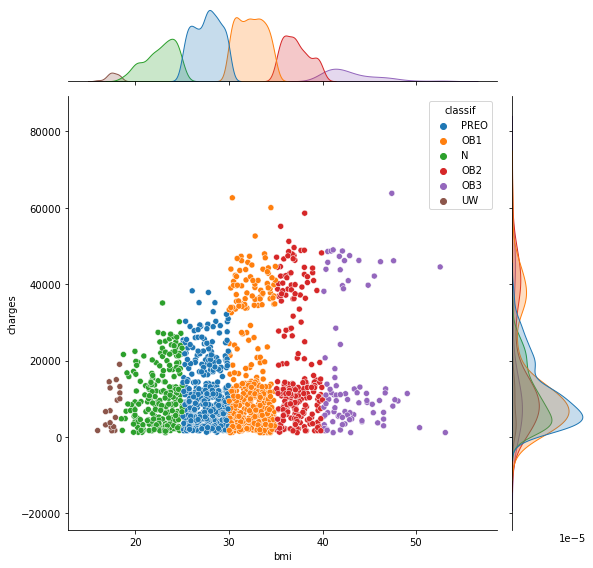

In [21]:
fig=plt.figure(figsize=(10,10))
sns.jointplot(data=df, x="bmi", y="charges", hue="classif",height=8);

#### INTERPRETATION: OB3 HAS HIGHEST DISTRIBUTION FOR CHARGES WITH BMI 40-50.

In [22]:
le=preprocessing.LabelEncoder()                               #LABEL ENCODING
df['smoker']=le.fit_transform(df['smoker'])
df['sex']=le.fit_transform(df['sex'])
df['classif']=le.fit_transform(df['classif'])
df['region']=le.fit_transform(df['region'])

In [23]:
ss=StandardScaler()                                           #SCALING
df_scaled=pd.DataFrame(ss.fit_transform(df),columns=df.columns)
df_scaled

,age,sex,bmi,classif,children,smoker,region,charges
0,-1.428919,-1.010519,-0.453320,1.240680,-0.908614,1.970587,1.343905,0.298584
1,-1.499928,0.989591,0.509621,-0.697852,-0.078767,-0.507463,0.438495,-0.953689
2,-0.789846,0.989591,0.383307,-0.697852,1.580926,-0.507463,0.438495,-0.728675
3,-2.778074,0.989591,-1.305531,-1.344030,-0.908614,-0.507463,-0.466915,0.719843
4,-0.505814,0.989591,-0.292556,1.240680,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...,...
1333,0.772333,0.989591,0.050297,-0.697852,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.499928,-1.010519,0.206139,-0.697852,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.499928,-1.010519,1.014878,-0.051675,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.286903,-1.010519,-0.797813,1.240680,-0.908614,-0.507463,1.343905,-0.930362


In [24]:
y=df_scaled['charges']                           #SPLITING THE DATA
x=df_scaled
df_scaled.drop('charges',inplace=True,axis=1)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 7), (268, 7), (1070,), (268,))

## MODELS:

#### LINEAR REGRESSION MODEL

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
ts=lr.score(x_train,y_train)
tes=lr.score(x_test,y_test)
print("train score==> ",ts)
print("test score==> ",tes)

train score==>  0.7411523840651455
test score==>  0.7806908246788654


In [28]:
y_pred=lr.predict(x_test)

In [29]:
model_performance=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
print("MODEL PERFORMANCE is : ",model_performance)
print("MSE value is : ",mse)
print("MAE value is : ",mae)
print("RMSE value is : ",rmse)

MODEL PERFORMANCE is :  0.7029937710321331
MSE value is :  0.2323381227732736
MAE value is :  0.3499427696042848
RMSE value is :  0.48201464995710824


#### DECISION TREE REGRESSOR

In [30]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [31]:
ts=dtr.score(x_train,y_train)
tes=dtr.score(x_test,y_test)
print("train score==> ",ts)
print("test score==> ",tes)

train score==>  0.9983078124756305
test score==>  0.6881954254949886


In [32]:
y_pred=dtr.predict(x_test)

In [33]:
model_performance2=r2_score(y_pred,y_test)
mse2=mean_squared_error(y_pred,y_test)
mae2=mean_absolute_error(y_test,y_pred)
rmse2=mean_squared_error(y_test,y_pred,squared=False)
print("MODEL PERFORMANCE is : ",model_performance2)
print("MSE value is : ",mse2)
print("MAE value is : ",mae2)
print("RMSE value is : ",rmse2)

MODEL PERFORMANCE is :  0.7146818589382244
MSE value is :  0.33032858477778565
MAE value is :  0.2894024524708137
RMSE value is :  0.5747421898362653


#### K-NEIGHBOR REGRESSOR

In [34]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [35]:
ts=knr.score(x_train,y_train)
tes=knr.score(x_test,y_test)
print("train score==> ",ts)
print("test score==> ",tes)

train score==>  0.8873406608736815
test score==>  0.8348195019030381


In [36]:
y_pred=knr.predict(x_test)

In [37]:
model_performance3=r2_score(y_pred,y_test)
mse3=mean_squared_error(y_pred,y_test)
mae3=mean_absolute_error(y_test,y_pred)
rmse3=mean_squared_error(y_test,y_pred,squared=False)
print("MODEL PERFORMANCE is : ",model_performance3)
print("MSE value is : ",mse3)
print("MAE value is : ",mae3)
print("RMSE value is : ",rmse3)

MODEL PERFORMANCE is :  0.8125678598870313
MSE value is :  0.17499371282759094
MAE value is :  0.24819798003203472
RMSE value is :  0.4183224985912077


#### LASSO(Least Absolute Selection Shrinkage Operator)

In [38]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [39]:
ts=lasso.score(x_train,y_train)
tes=lasso.score(x_test,y_test)
print("train score==> ",ts)
print("test score==> ",tes)

train score==>  0.0
test score==>  -0.0009192486886582252


In [40]:
y_pred=lasso.predict(x_test)

In [41]:
model_performance4=r2_score(y_pred,y_test)
mse4=mean_squared_error(y_pred,y_test)
mae4=mean_absolute_error(y_test,y_pred)
rmse4=mean_squared_error(y_test,y_pred,squared=False)
print("MODEL PERFORMANCE is : ",model_performance4)
print("MSE value is : ",mse4)
print("MAE value is : ",mae4)
print("RMSE value is : ",rmse4)

MODEL PERFORMANCE is :  0.0
MSE value is :  1.0603828998373306
MAE value is :  0.7924786557687851
RMSE value is :  1.0297489499083408


#### BOOSTING(ADABOOST REGRESSOR)

In [42]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [43]:
ts=ada.score(x_train,y_train)
tes=ada.score(x_test,y_test)
print("train score==> ",ts)
print("test score==> ",tes)

train score==>  0.8178387269505565
test score==>  0.8063004352903991


In [44]:
y_pred=ada.predict(x_test)

In [45]:
model_performance5=r2_score(y_pred,y_test)
mse5=mean_squared_error(y_pred,y_test)
mae5=mean_absolute_error(y_test,y_pred)
rmse5=mean_squared_error(y_test,y_pred,squared=False)
print("MODEL PERFORMANCE is : ",model_performance5)
print("MSE value is : ",mse5)
print("MAE value is : ",mae5)
print("RMSE value is : ",rmse5)

MODEL PERFORMANCE is :  0.7493273959981847
MSE value is :  0.20520706979418357
MAE value is :  0.38244927580930893
RMSE value is :  0.4529978695249941


### =========== CROSS VALIDATION ===============

In [46]:
KF=KFold()

In [47]:
cv1=cross_val_score(LinearRegression(),x,y,cv=KF,scoring='r2').mean()
print("CROSS VAL SCORE FOR ",KF, "is------> ",cv1)

CROSS VAL SCORE FOR  KFold(n_splits=5, random_state=None, shuffle=False) is------>  0.7461876403787864


In [48]:
cv2=cross_val_score(DecisionTreeRegressor(),x,y,cv=KF,scoring='r2').mean()
print("CROSS VAL SCORE FOR ",KF, "is------> ",cv2)

CROSS VAL SCORE FOR  KFold(n_splits=5, random_state=None, shuffle=False) is------>  0.7100894796243974


In [49]:
cv3=cross_val_score(KNeighborsRegressor(),x,y,cv=KF,scoring='r2').mean()
print("CROSS VAL SCORE FOR ",KF, "is------> ",cv3)

CROSS VAL SCORE FOR  KFold(n_splits=5, random_state=None, shuffle=False) is------>  0.8285561492938716


In [50]:
cv4=cross_val_score(Lasso(),x,y,cv=KF,scoring='r2').mean()
print("CROSS VAL SCORE FOR ",KF, "is------> ",cv4)

CROSS VAL SCORE FOR  KFold(n_splits=5, random_state=None, shuffle=False) is------>  -0.0007526656095312223


In [51]:
cv5=cross_val_score(AdaBoostRegressor(),x,y,cv=KF,scoring='r2').mean()
print("CROSS VAL SCORE FOR ",KF, "is------> ",cv5)

CROSS VAL SCORE FOR  KFold(n_splits=5, random_state=None, shuffle=False) is------>  0.8200888356695215


In [52]:
fin=[]
models=['Linear Regression ','DecisionTreeRegressor ','KNeighborsRegressor ','Lasso ','AdaBoostRegressor']
model_cv=[cv1,cv2,cv3,cv4,cv5]
for i in model_cv:
    fin.append(model_cv)

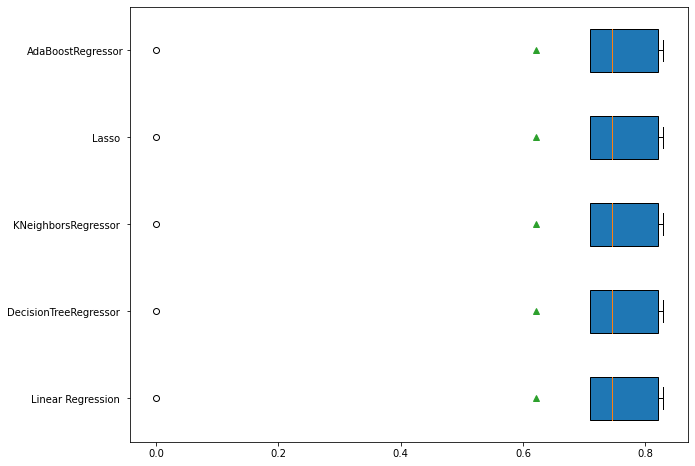

In [53]:
plt.figure(figsize=(10,8))
plt.boxplot(fin,labels=models, showmeans=True,vert=False,patch_artist=True)
plt.show()

### ========= HYPERPARAMETER TUNING ============

In [54]:
from sklearn.model_selection import GridSearchCV

#### ~ for Decision tree regressor

In [55]:
parameters={"splitter":["best","random"],"max_depth" : [3,5,7,9]}

In [56]:
gsv=GridSearchCV(dtr, param_grid=parameters,cv=KF)
dtr_f=gsv.fit(x_train,y_train)

In [57]:
dtr_f.best_params_

{'max_depth': 5, 'splitter': 'random'}

In [58]:
dtr_f.best_score_

0.8343066956967643

In [59]:
dtr1=DecisionTreeRegressor(max_depth=5, splitter='best')
dtr1.fit(x_train,y_train)
ts=dtr1.score(x_train,y_train)
tes=dtr1.score(x_test,y_test)
print("train score==> ",ts)
print("test score==> ",tes)

train score==>  0.8786108701129692
test score==>  0.8413825396537239


In [60]:
y_pred_1=dtr1.predict(x_test)

In [61]:
model_performance_2=r2_score(y_pred_1,y_test)
mse_2=mean_squared_error(y_pred_1,y_test)
mae_2=mean_absolute_error(y_test,y_pred_1)
rmse_2=mean_squared_error(y_test,y_pred_1,squared=False)
print("MODEL PERFORMANCE is : ",model_performance_2)
print("MSE value is : ",mse_2)
print("MAE value is : ",mae_2)
print("RMSE value is : ",rmse_2)

MODEL PERFORMANCE is :  0.8342876111001775
MSE value is :  0.1680407713081509
MAE value is :  0.23463478495319356
RMSE value is :  0.40992776352444205


#### ~ KNeighbors regressor

In [62]:
params={ 'n_neighbors':[2,3,5,8,10], 'weights':['uniform','distance']}

In [63]:
gsv1=GridSearchCV(knr, param_grid=params,cv=KF)
knr_f=gsv1.fit(x_train,y_train)

In [64]:
knr_f.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [65]:
knr1=KNeighborsRegressor(n_neighbors= 10, weights='distance')
knr1.fit(x_train,y_train)
ts=knr1.score(x_train,y_train)
tes=knr1.score(x_test,y_test)
print("train score==> ",ts)
print("test score==> ",tes)

train score==>  0.9983078124756305
test score==>  0.8405545864451075


In [66]:
y_pred2=knr1.predict(x_test)

In [67]:
model_performance_3=r2_score(y_pred2,y_test)
mse_3=mean_squared_error(y_pred2,y_test)
mae_3=mean_absolute_error(y_test,y_pred2)
rmse_3=mean_squared_error(y_test,y_pred2,squared=False)
print("MODEL PERFORMANCE is : ",model_performance_3)
print("MSE value is : ",mse_3)
print("MAE value is : ",mae_3)
print("RMSE value is : ",rmse_3)

MODEL PERFORMANCE is :  0.81588525139797
MSE value is :  0.16891791242161486
MAE value is :  0.23362095931951307
RMSE value is :  0.41099624380475164


#### ~Lasso

In [68]:
param={'selection':['cyclic', 'random'],'alpha':[1.0,0.1,0.2,0.3,0.9]}

In [69]:
gsv2=GridSearchCV(lasso, param_grid=param,cv=KF)
las_f=gsv2.fit(x_train,y_train)

In [70]:
las_f.best_params_

{'alpha': 0.1, 'selection': 'cyclic'}

In [71]:
lasso1=Lasso(alpha= 0.1, selection= 'cyclic')
lasso1.fit(x_train,y_train)
ts=lasso1.score(x_train,y_train)
tes=lasso1.score(x_test,y_test)
print("train score==> ",ts)
print("test score==> ",tes)

train score==>  0.7063826993034135
test score==>  0.7428673051588748


In [72]:
y_pred3=lasso1.predict(x_test)

In [73]:
model_performance_4=r2_score(y_pred3,y_test)
mse_4=mean_squared_error(y_pred3,y_test)
mae_4=mean_absolute_error(y_test,y_pred3)
rmse_4=mean_squared_error(y_test,y_pred3,squared=False)
print("MODEL PERFORMANCE is : ",model_performance_4)
print("MSE value is : ",mse_4)
print("MAE value is : ",mae_4)
print("RMSE value is : ",rmse_4)

MODEL PERFORMANCE is :  0.4917691627353433
MSE value is :  0.27240870125721006
MAE value is :  0.3812640095334276
RMSE value is :  0.5219278697839482


#### ~ Adaboost regressor

In [74]:
parameter={'n_estimators':[50,30,40,20,100] , 'learning_rate':[0.4,0.8,1.0,2.0]}

In [75]:
gsv3=GridSearchCV(ada, param_grid=parameter,cv=KF)
ada_f=gsv3.fit(x_train,y_train)

In [76]:
ada_f.best_params_

{'learning_rate': 2.0, 'n_estimators': 40}

In [77]:
ada1=AdaBoostRegressor(learning_rate= 2.0, n_estimators=40)
ada1.fit(x_train,y_train)
ts=ada1.score(x_train,y_train)
tes=ada1.score(x_test,y_test)
print("train score==> ",ts)
print("test score==> ",tes)

train score==>  0.8473570384939584
test score==>  0.8468262664086045


In [78]:
y_pred4=ada1.predict(x_test)

In [79]:
model_performance_5=r2_score(y_pred4,y_test)
mse_5=mean_squared_error(y_pred4,y_test)
mae_5=mean_absolute_error(y_test,y_pred4)
rmse_5=mean_squared_error(y_test,y_pred4,squared=False)
print("MODEL PERFORMANCE is : ",model_performance_5)
print("MSE value is : ",mse_5)
print("MAE value is : ",mae_5)
print("RMSE value is : ",rmse_5)

MODEL PERFORMANCE is :  0.8358179937939795
MSE value is :  0.16227363797564184
MAE value is :  0.24653662972682341
RMSE value is :  0.4028320220335541


#### DATAFRAME WITH CROSS VALIDAION:

In [80]:
model_cv=[cv1,cv2,cv3,cv4,cv5]
models=['Linear Regression ','DecisionTreeRegressor ','KNeighborsRegressor ','Lasso ','AdaBoostRegressor']
df5=pd.DataFrame({'Models':models,'CV-Score ':model_cv})
df5

,Models,CV-Score
0,Linear Regression,0.746188
1,DecisionTreeRegressor,0.710089
2,KNeighborsRegressor,0.828556
3,Lasso,-0.000753
4,AdaBoostRegressor,0.820089


#### DATAFRAME WITHOUT HYPERPARAMETER TUNING:

In [81]:
r2=[model_performance,model_performance2,model_performance3,model_performance4,model_performance5]
ms_e=[mse,mse2,mse3,mse4,mse5]
ma_e=[mae,mae2,mae3,mae4,mae5]
rms_e=[rmse,rmse2,rmse3,rmse4,rmse5]
models=['Linear Regression ','DecisionTreeRegressor ','KNeighborsRegressor ','Lasso ','AdaBoostRegressor']
df6=pd.DataFrame({'Models':models,'Model Performance ':r2,'Mean Squared Error':ms_e,'Mean Absolute Error':ma_e,'RootMean Squared Error':rms_e})
df6

,Models,Model Performance,Mean Squared Error,Mean Absolute Error,RootMean Squared Error
0,Linear Regression,0.702994,0.232338,0.349943,0.482015
1,DecisionTreeRegressor,0.714682,0.330329,0.289402,0.574742
2,KNeighborsRegressor,0.812568,0.174994,0.248198,0.418322
3,Lasso,0.000000,1.060383,0.792479,1.029749
4,AdaBoostRegressor,0.749327,0.205207,0.382449,0.452998


#### DATAFRAME WITH HYPERPARAMETER TUNING:

In [82]:
r2=[model_performance_2,model_performance_3,model_performance_4,model_performance_5]
ms_e=[mse_2,mse_3,mse_4,mse_5]
ma_e=[mae_2,mae_3,mae_4,mae_5]
rms_e=[rmse_2,rmse_3,rmse_4,rmse_5]
models=['DecisionTreeRegressor ','KNeighborsRegressor ','Lasso ','AdaBoostRegressor']
df6=pd.DataFrame({'Models':models,'Model Performance ':r2,'Mean Squared Error':ms_e,'Mean Absolute Error':ma_e,'RootMean Squared Error':rms_e})
df6

,Models,Model Performance,Mean Squared Error,Mean Absolute Error,RootMean Squared Error
0,DecisionTreeRegressor,0.834288,0.168041,0.234635,0.409928
1,KNeighborsRegressor,0.815885,0.168918,0.233621,0.410996
2,Lasso,0.491769,0.272409,0.381264,0.521928
3,AdaBoostRegressor,0.835818,0.162274,0.246537,0.402832


#### FINAL_DATAFRAME FOR BEST MODEL

In [83]:
dataf=pd.DataFrame({"ACTUAL VALUE":y_test,"PREDICTED VALUE(KNN WOH)":y_pred,"PREDICTED VALUES(ADA WH)":y_pred4})
dataf.head()

,ACTUAL VALUE,PREDICTED VALUE(KNN WOH),PREDICTED VALUES(ADA WH)
764,-0.344914,0.018925,-0.536188
887,-0.660713,-0.517338,-0.760982
890,1.326718,1.089418,0.968030
1293,-0.327829,0.018925,-0.216422
259,1.691784,1.913461,1.881090


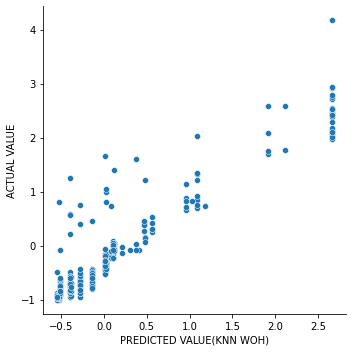

In [84]:
sns.relplot(data=dataf,x='PREDICTED VALUE(KNN WOH)',y='ACTUAL VALUE',kind='scatter');

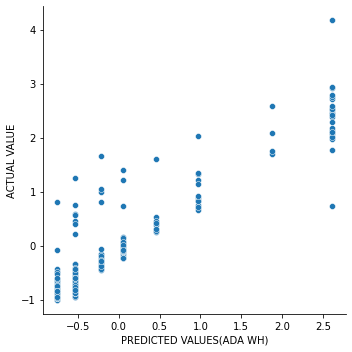

In [85]:
sns.relplot(data=dataf,x='PREDICTED VALUES(ADA WH)',y='ACTUAL VALUE',kind='scatter');

In [86]:
dataf.to_csv("MINI_PROJECT_2.csv",index=False)

In [87]:
df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [88]:
df.head(2)

,age,sex,bmi,classif,children,smoker,region,charges
0,19.0,0,27.90,4,0,1,3,16884.9240
1,18.0,1,33.77,1,1,0,2,1725.5523


In [89]:
list1=[]
columns=['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region']
for i in columns:
    input1=input(f"Please Enter {i} ==> ")
    list1.append(input1)
new=np.array([]).reshape(1,-1)
new1=np.append(new,list1).reshape(1,-1)
ada1.predict(new1)

Please Enter age ==> 43
Please Enter sex ==> 1
Please Enter bmi ==> 23
Please Enter classif ==> 3
Please Enter children ==> 5
Please Enter smoker ==> 1
Please Enter region ==> 2


array([2.61064742])

In [90]:
new

array([], shape=(1, 0), dtype=float64)

In [91]:
new1=np.append(new,list1).reshape(1,-1)
new1

array([['43', '1', '23', '3', '5', '1', '2']], dtype='<U32')

# INTERPRETATION: 
- CV-SCORE FOR K NEAREST IS HIGHEST . 
- WITHOUT HYPERPARAMETER TUNING K NEAREST NEIGHBORS IS SHOWING BEST MODEL PERFORMANCE WITH LEAST ERRORS.
- WITH HYPERPARAMETER TUNING , EVERY MODEL IS PERFORMING BETTER THAN PREVIOUS BUT ADABOOST IS PERFORMING BEST. 